In [2]:
# Simulación y análisis de señales con FFT y STFT (Python)
Objetivo: visualizar señales en tiempo y frecuencia, demostrar propiedades y comparar ventanas.

SyntaxError: invalid syntax (2165494890.py, line 2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft, get_window
fs = 1000; T = 1.0; N = int(fs*T); t = np.arange(N)/fs
def fft_mag_phase(x, fs):
    X = np.fft.fft(x); f = np.fft.fftfreq(len(x), d=1/fs)
    Xs = np.fft.fftshift(X); fs_shift = np.fft.fftshift(f)
    return fs_shift, np.abs(Xs), np.angle(Xs)

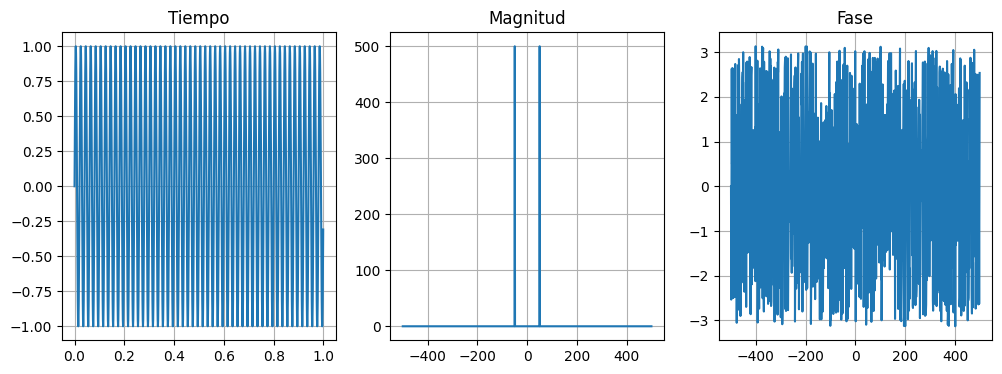

In [4]:
# Senoidal 50 Hz
x_sine = np.sin(2*np.pi*50*t)
f_sine, mag_sine, phase_sine = fft_mag_phase(x_sine, fs)
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(t,x_sine); ax[0].set_title("Tiempo")
ax[1].plot(f_sine,mag_sine); ax[1].set_title("Magnitud")
ax[2].plot(f_sine,phase_sine); ax[2].set_title("Fase")
for a in ax: a.grid(True)
plt.show()

In [ ]:
# Ventanas comparadas
windows = ["boxcar","hamming","hann","blackman"]
plt.figure(figsize=(10,4))
for wname in windows:
    w = get_window(wname, N)
    Xw = np.fft.fftshift(np.fft.fft(x_sine*w))
    f = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))
    plt.plot(f, np.abs(Xw), label=wname)
plt.title("Comparación de ventanas"); plt.xlabel("Hz"); plt.ylabel("|X|"); plt.grid(True); plt.legend(); plt.show()

In [ ]:
# STFT
x_chirp = np.concatenate([np.sin(2*np.pi*50*t[:N//2]), np.sin(2*np.pi*150*t[N//2:])])
f_stft, t_stft, Zxx = stft(x_chirp, fs=fs, window='hamming', nperseg=128, noverlap=96, boundary=None)
plt.figure(figsize=(10,4))
plt.pcolormesh(t_stft, f_stft, 20*np.log10(np.abs(Zxx)+1e-12), shading='gouraud', cmap='magma')
plt.title("Espectrograma STFT"); plt.xlabel("Tiempo [s]"); plt.ylabel("Frecuencia [Hz]"); plt.colorbar(label="dB")
plt.show()

In [ ]:
## Conclusiones
- Ventanas reducen leakage a costa de ancho de lóbulo.
- STFT revela cambios en contenido frecuencial en el tiempo.